In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import xml.etree.ElementTree as ET

In [90]:
path = "C:/Python/Quera/Quera_Projects/Second Project/car_img-validation/validation/day_00011"
img_path = path + ".jpg"
xml_path = path + ".xml"

img = cv2.imread(img_path)

tree = ET.parse(xml_path)
root = tree.getroot()

objects_list = [
    {
        'name': obj.find('name').text,
        'bbox': {
            'xmin': int(obj.find('bndbox').find('xmin').text),
            'ymin': int(obj.find('bndbox').find('ymin').text),
            'xmax': int(obj.find('bndbox').find('xmax').text),
            'ymax': int(obj.find('bndbox').find('ymax').text)
        }
    }
    for obj in root.findall('object')
]

In [91]:
objects_list

[{'name': 'کل ناحیه پلاک',
  'bbox': {'xmin': 404, 'ymin': 369, 'xmax': 485, 'ymax': 389}},
 {'name': '7', 'bbox': {'xmin': 412, 'ymin': 371, 'xmax': 420, 'ymax': 386}},
 {'name': '8', 'bbox': {'xmin': 419, 'ymin': 372, 'xmax': 428, 'ymax': 386}},
 {'name': 'س', 'bbox': {'xmin': 428, 'ymin': 371, 'xmax': 442, 'ymax': 386}},
 {'name': '9', 'bbox': {'xmin': 442, 'ymin': 371, 'xmax': 450, 'ymax': 386}},
 {'name': '2', 'bbox': {'xmin': 450, 'ymin': 371, 'xmax': 458, 'ymax': 386}},
 {'name': '6', 'bbox': {'xmin': 457, 'ymin': 371, 'xmax': 465, 'ymax': 386}},
 {'name': '1', 'bbox': {'xmin': 469, 'ymin': 373, 'xmax': 475, 'ymax': 387}},
 {'name': '6', 'bbox': {'xmin': 475, 'ymin': 373, 'xmax': 483, 'ymax': 387}}]

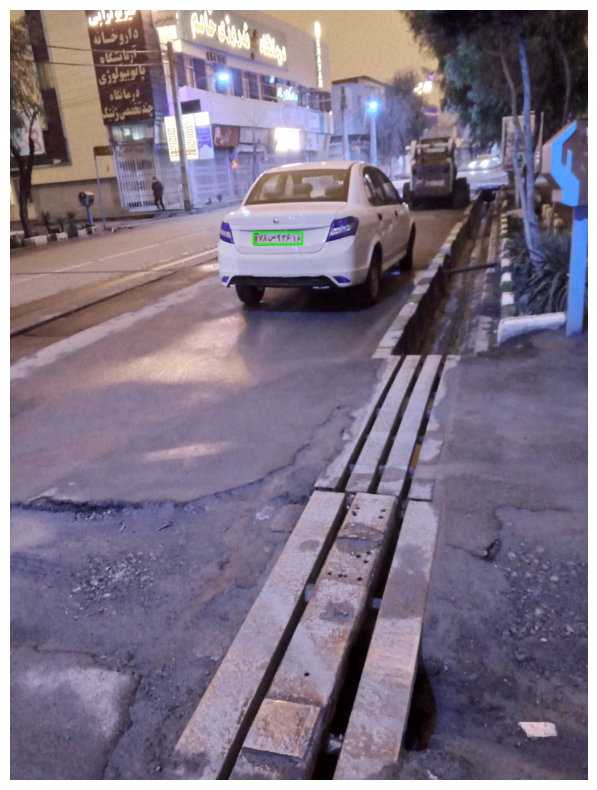

In [92]:
bbox = objects_list[0]['bbox']
start_point = (bbox['xmin'], bbox['ymin'])
end_point = (bbox['xmax'], bbox['ymax'])
color = (0, 255, 0)
thickness = 2
img_marked = img.copy()
img_marked = cv2.rectangle(img_marked, start_point, end_point, color, thickness)
    
plt.figure(figsize=(10, 10))
plt.imshow(img_marked)
plt.axis('off')
plt.show()

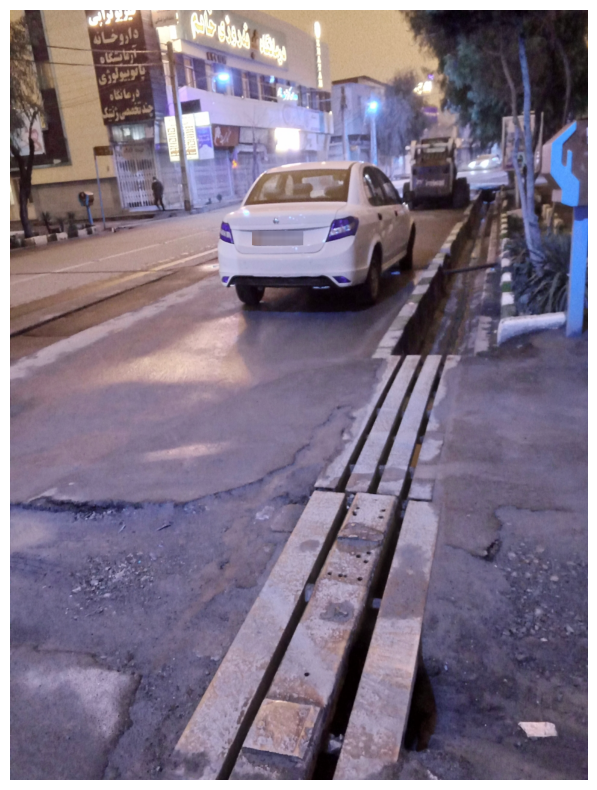

In [99]:
test = img.copy()
margin = 2
area = test[bbox['ymin']-margin:bbox['ymax']+margin, bbox['xmin']-margin:bbox['xmax']+margin]
blurred_area = cv2.GaussianBlur(area, (21, 21), 10)
test[bbox['ymin']-margin:bbox['ymax']+margin, bbox['xmin']-margin:bbox['xmax']+margin] = blurred_area

plt.figure(figsize=(10, 10))
plt.imshow(test)
plt.axis('off')
plt.show()